In [1]:
import os
%cd "/content/drive/MyDrive/Colab Notebooks/coc_datasets"

/content/drive/MyDrive/Colab Notebooks/coc_datasets


In [4]:
!pip install python-chess
import chess.pgn

In [15]:
import pandas as pd
train_df = pd.read_csv("train.csv", index_col='id')
train_df

,board,black_score,best_move
id,,,
80091,6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118,0.0,g8d8
18578,r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...,-131.0,f3e5
11580,r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...,-490.0,g6f7
72805,8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85,-574.0,h6h5
74310,8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90,0.0,e5e6
...,...,...,...
71594,3b4/8/8/4kB2/8/8/4K3/8 b - - 2 81,0.0,e5f4
75035,8/8/R5KP/8/8/pk5r/8/8 w - - 5 92,0.0,g6g7
4412,rnbqk1nr/pp2ppbp/6p1/3p4/2pP4/4PN1P/PPP1BPP1/R...,-78.0,b2b3


In [6]:
import numpy as np

def one_hot_encode_peice(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

# Let's test on a black bishop
one_hot_encode_peice('b')

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
str(chess.Board()).replace(' ', '')

'rnbqkbnr\npppppppp\n........\n........\n........\n........\nPPPPPPPP\nRNBQKBNR'

In [14]:
def encode_board(board):
    # first lets turn the board into a string
    board_str = str(board)
    # then lets remove all the spaces
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_peice(piece))
        board_list.append(row_list)
    return np.array(board_list)

# Let's test on the starting board
encode_board(chess.Board())

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

    

In [24]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)
#encode_fen_string(train_df.iloc[0]['board'])

In [31]:
# We'll stack all our encoded boards into a single numpy array
X = np.stack(train_df['board'].apply(encode_fen_string))
y = train_df['black_score']


#X_val = np.stack(val_df['board'].apply(encode_fen_string))
#y_val = val_df['black_score']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_train.shape)
print(y_train.shape)

(49967, 8, 8, 13)
(49967,)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
import tensorflow as tf

In [87]:
# With the Keras Sequential model we can stack neural network layers together
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
model = Sequential([
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(1),
])
metric = tf.keras.metrics.RootMeanSquaredError()
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
model.compile(
    'rmsprop',
    loss='root_mean_squared_error',metrics = [metric])
model.build((None, 8, 8, 13)) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
# To test things out, let's train for 20 epochs and see how our model is doing
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 832)               0         
                                                                 
 dense_143 (Dense)           (None, 64)                53312     
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_144 (Dense)           (None, 128)               8320      
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_145 (Dense)           (None, 256)               33024     
                                                                 
 dropout_29 (Dropout)        (None, 256)             

In [88]:
history = model.fit(
    X_train,
    y_train,
    epochs=35,
    validation_data=(X_test, y_test))#, callbacks=[callback])

Epoch 1/35
1562/1562 [==============================] - 14s 8ms/step - loss: 136717.1094 - root_mean_squared_error: 369.7528 - val_loss: 106875.9531 - val_root_mean_squared_error: 326.9189
Epoch 2/35
1562/1562 [==============================] - 13s 8ms/step - loss: 106396.9766 - root_mean_squared_error: 326.1855 - val_loss: 90680.0469 - val_root_mean_squared_error: 301.1313
Epoch 3/35
1562/1562 [==============================] - 13s 8ms/step - loss: 93662.2266 - root_mean_squared_error: 306.0428 - val_loss: 80222.5859 - val_root_mean_squared_error: 283.2359
Epoch 4/35
1562/1562 [==============================] - 12s 8ms/step - loss: 85140.4531 - root_mean_squared_error: 291.7884 - val_loss: 76660.9453 - val_root_mean_squared_error: 276.8771
Epoch 5/35
1562/1562 [==============================] - 14s 9ms/step - loss: 78529.5859 - root_mean_squared_error: 280.2313 - val_loss: 68615.3359 - val_root_mean_squared_error: 261.9453
Epoch 6/35
1562/1562 [==============================] - 14s 9m

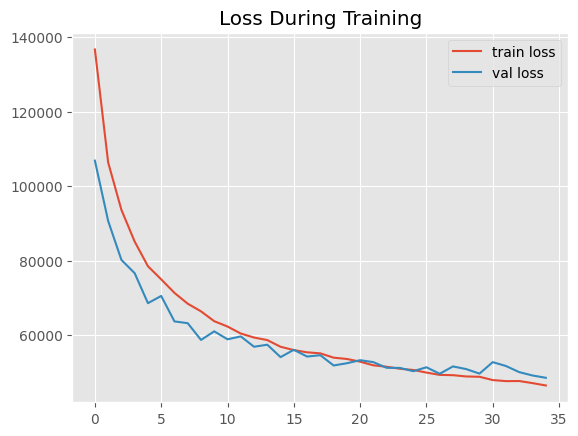

In [89]:
import matplotlib.pyplot as plt

# Lets plot the history of our training session to see how things progressed over time
plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

pgn = open("Carlsen.pgn")
sides = []
games = []
length = 1666
for i in range(length):
    try:
        if chess.pgn.read_game(pgn).mainline_moves():
            games.append(chess.pgn.read_game(pgn).mainline_moves())
            sides.append(chess.pgn.read_game(pgn).headers["White"])
    except:
        print(i,chess.pgn.read_game(pgn))
        pass
len(games)
X = []
y = []
counter2 = 0
for game in games:
    board = chess.Board()
    white = sides[counter2]
    if white == 'Carlsen,Magnus':
        remainder = 0
    else:
        remainder = 1
    counter = 0
    for move in game:
        if counter % 2 == remainder:
            X.append(board.copy())
        board.push(move)
        if counter % 2 == remainder:
            y.append(board.copy())
        counter += 1
    counter2 += 1
  chess_dict = {
    'p' : [1,0,0,0,0,0,0,0,0,0,0,0,0],
    'P' : [0,0,0,0,0,0,1,0,0,0,0,0,0],
    'n' : [0,1,0,0,0,0,0,0,0,0,0,0,0],
    'N' : [0,0,0,0,0,0,0,1,0,0,0,0,0],
    'b' : [0,0,1,0,0,0,0,0,0,0,0,0,0],
    'B' : [0,0,0,0,0,0,0,0,1,0,0,0,0],
    'r' : [0,0,0,1,0,0,0,0,0,0,0,0,0],
    'R' : [0,0,0,0,0,0,0,0,0,1,0,0,0],
    'q' : [0,0,0,0,1,0,0,0,0,0,0,0,0],
    'Q' : [0,0,0,0,0,0,0,0,0,0,1,0,0],
    'k' : [0,0,0,0,0,1,0,0,0,0,0,0,0],
    'K' : [0,0,0,0,0,0,0,0,0,0,0,1,0],
    '.' : [0,0,0,0,0,0,0,0,0,0,0,0,1],
}
def make_matrix(board):
    pgn = board.epd()
    foo = []  
    pieces = pgn.split(" ", 1)[0]
    rows = pieces.split("/")
    for row in rows:
        foo2 = []  
        for thing in row:
            if thing.isdigit():
                for i in range(0, int(thing)):
                    foo2.append('.')
            else:
                foo2.append(thing)
        foo.append(foo2)
    return foo
def translate(matrix,chess_dict):
    rows = []
    for row in matrix:
        terms = []
        for term in row:
            terms.append(chess_dict[term])
        rows.append(terms)
    return rows
import numpy as np
for i in range(len(X)):
    X[i] = translate(make_matrix(X[i]),chess_dict)
for i in range(len(y)):
    y[i] = translate(make_matrix(y[i]),chess_dict)
X = np.array(X)
y = np.array(y)